# Multi-session analysis
This notebook demonstrate how to combine different xarray dataset together and perform group-level analysis

In [1]:
import xarray as xr
import matplotlib.pylab as plt
import seaborn as sns
from pathlib import Path
import pandas as pd
from tqdm import tqdm
import numpy as np
from glob import glob

## Loading data

In [2]:
def load_dataset_coords(filenames):
    ds_list=[]
    for f in tqdm(filenames):
        ds = xr.open_dataset(f) 
        ds = ds.drop_dims('time') # for performance reason
        ds_list.append(ds)
        ds.close()
        
    return ds_list

In [3]:
fns = glob(r'Z:/Teris/ASAP/expt_sessions/kms*/processed/xr_session.nc')
ds_list = load_dataset_coords(fns)


100%|██████████| 104/104 [00:15<00:00,  6.74it/s]


In [4]:
# Combine the dataset together
ds_combined = xr.combine_nested(ds_list,'session_id')

In [5]:
ds_combined

<xarray.Dataset>
Dimensions:                            (trial_nb: 254, event_time: 120,
                                        session_id: 104)
Coordinates:
  * trial_nb                           (trial_nb) int64 1 2 3 4 ... 252 253 254
  * event_time                         (event_time) float64 -1.975e+03 ... 3....
  * session_id                         (session_id) object 'kms058-2023-02-20...
Data variables: (12/20)
    uid                                (session_id, trial_nb) object 'kms058_...
    trigger                            (session_id, trial_nb) object 'hold_fo...
    valid                              (session_id, trial_nb) float64 1.0 ......
    break_after_abort                  (session_id, trial_nb) float64 0.0 ......
    US_end_timer                       (session_id, trial_nb) float64 1.0 ......
    water_on                           (session_id, trial_nb) float64 1.0 ......
    ...                                 ...
    success                            (session_id, trial_nb) float64 1.0 ......
    hold_for_water_analog_1_df_over_f  (session_id, trial_nb, event_time) float64 ...
    first_bar_off_analog_1_df_over_f   (session_id, trial_nb, event_time) float64 ...
    first_spout_analog_1_df_over_f     (session_id, trial_nb, event_time) float64 ...
    busy_win                           (session_id, trial_nb) float64 nan ......
    busy_win_analog_1_df_over_f        (session_id, trial_nb, event_time) float64 ...

## Plot figures

<Axes: xlabel='event_time', ylabel='hold_for_water_analog_1_df_over_f'>

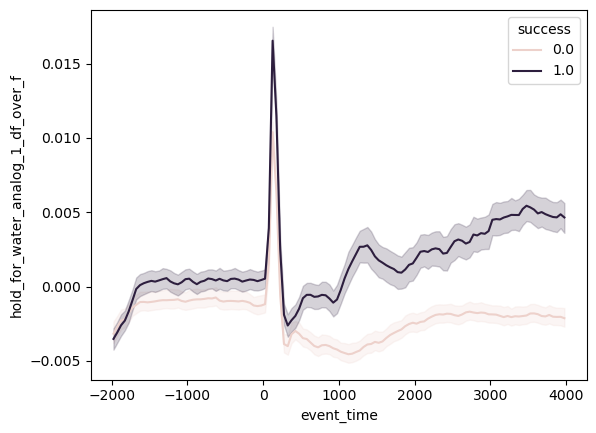

In [10]:
df2plot = ds_combined[['hold_for_water_analog_1_df_over_f', 'success']].to_dataframe().reset_index()
sns.lineplot(x='event_time',hue='success',
            y='hold_for_water_analog_1_df_over_f', data=df2plot)

<Axes: xlabel='event_time', ylabel='first_bar_off_analog_1_df_over_f'>

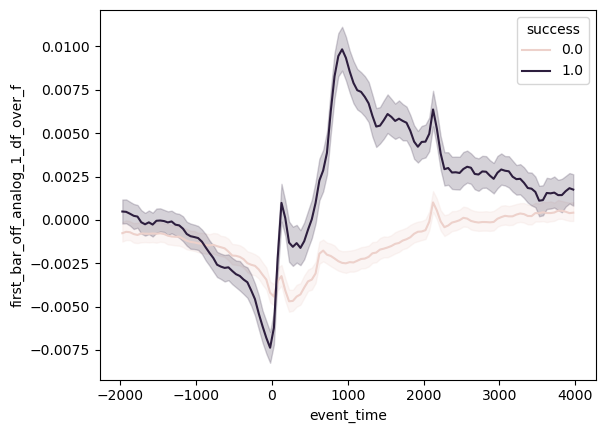

In [11]:
df2plot = ds_combined[['first_bar_off_analog_1_df_over_f', 'success']].to_dataframe().reset_index()
sns.lineplot(x='event_time',hue='success',
            y='first_bar_off_analog_1_df_over_f', data=df2plot)

<Axes: xlabel='event_time', ylabel='first_spout_analog_1_df_over_f'>

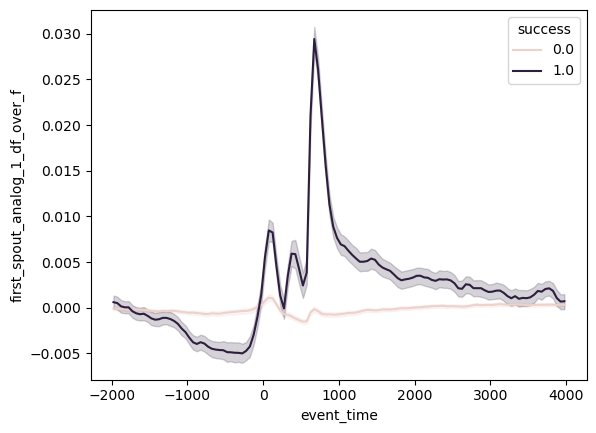

In [12]:
df2plot = ds_combined[['first_spout_analog_1_df_over_f', 'success']].to_dataframe().reset_index()
sns.lineplot(x='event_time',hue='success',
            y='first_spout_analog_1_df_over_f', data=df2plot)

### ACh

In [15]:
fns = glob(r'Z:/Teris/ASAP/expt_sessions/RE603*/processed/xr_session.nc')
ds_list = load_dataset_coords(fns, ['event_time','trial_nb'])
ds_ach_combined = xr.combine_nested(ds_list,'session_id')

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  6.35it/s]


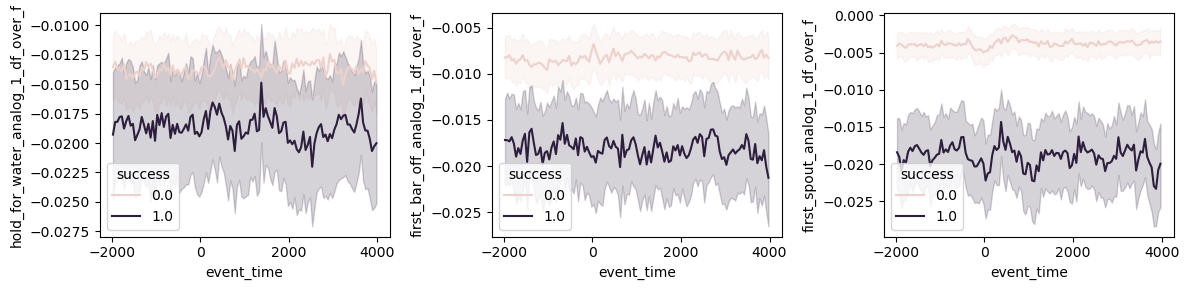

In [16]:
fig,ax = plt.subplots(1,3,figsize=(4*3,3))

df2plot = ds_ach_combined[['hold_for_water_analog_1_df_over_f', 'success']].to_dataframe().reset_index()
sns.lineplot(x='event_time',hue='success',
            y='hold_for_water_analog_1_df_over_f', data=df2plot, ax=ax[0])

df2plot = ds_ach_combined[['first_bar_off_analog_1_df_over_f', 'success']].to_dataframe().reset_index()
sns.lineplot(x='event_time',hue='success',
            y='first_bar_off_analog_1_df_over_f', data=df2plot, ax=ax[1])

df2plot = ds_ach_combined[['first_spout_analog_1_df_over_f', 'success']].to_dataframe().reset_index()
sns.lineplot(x='event_time',hue='success',
            y='first_spout_analog_1_df_over_f', data=df2plot, ax=ax[2])

fig.tight_layout()